In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
data, y = np.array(mnist.data, dtype='float32'), np.array(mnist.target, dtype='int')

# Reshape the data into 28x28 images
data = data.reshape(-1, 28, 28)
data = data.reshape(-1, 784,1)

In [3]:
# Split the data into training and testing sets
num_train = 60000
X_train, X_test = data[:num_train], data[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

div = X_test.max()

X_test = X_test / div
X_train = X_train / div


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip values to avoid log(0) or log(1)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

In [6]:
def predict(W1, b1, W2, b2, X):
    # Forward Propagation
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    predicted_class = np.argmax(A2)

    return predicted_class

In [8]:
def calculate_accuracy(W1, b1, W2, b2, X, y):
    correct_predictions = 0

    for i in range(len(X)):
        # Predict the class for each example
        prediction = predict(W1, b1, W2, b2, X[i])

        # Check if the prediction is correct
        if prediction == y[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(X)
    return accuracy

In [9]:
trained_W1, trained_b1, trained_W2, trained_b2 = None, None, None, None    

def initialize_parameters(num_features, num_hidden_units, num_output_units):
    # Use He initialization for weights
    #W1 = np.random.randn(num_hidden_units, num_features) * np.sqrt(2. / (num_features + num_hidden_units))
    W1 = np.random.randn(num_hidden_units, num_features)
    b1 = np.zeros((num_hidden_units, 1))
    #W2 = np.random.randn(num_output_units, num_hidden_units) * np.sqrt(2. / (num_hidden_units + num_output_units))
    W2 = np.random.randn(num_output_units, num_hidden_units)
    b2 = np.zeros((num_output_units, 1))
    
    return W1, b1, W2, b2

In [16]:
import numpy as np
from tqdm import tqdm

def gradient_descent(X_train, y_train, learning_rate=0.1, epochs=1):
    num_features = X_train.shape[1]
    num_hidden_units = 16
    num_output_units = 10

    # Initialize parameters
    # Check if trained parameters are available
    if trained_W1 is not None:
        W1 = trained_W1
        b1 = trained_b1
        W2 = trained_W2
        b2 = trained_b2
    else:
        # If not, initialize parameters
        W1, b1, W2, b2 = initialize_parameters(num_features, num_hidden_units, num_output_units)

    for epoch in range(epochs):
        epoch_loss = 0

        # Use tqdm for the progress bar
        for i in tqdm(range(len(X_train)), desc=f'Epoch {epoch} Loss: {epoch_loss}'):
            # Forward Propagation
            Input = X_train[i]
            
            Z1 = np.dot(W1, Input) + b1
            A1 = sigmoid(Z1)
   
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            
            if i== 0:
                print(Z2.max(),Z1.min(),Z1.max(),Z1.min())

            # if i == 0:
            #     print("A1 :",A1.T[0])
            #     print("A2 :",A2.T[0])
            # Backward Propagation
            y_true = np.zeros((num_output_units, 1))
            y_true[y_train[i]] = 1

            dz2 = A2 - y_true
 
            dw2 = np.dot(dz2, A1.T) * A2 * (1 - A2) 
            db2 = np.sum(dz2, axis=1, keepdims=True)

            dz1 = np.dot(W2.T, dz2) * A1 * (1 - A1)
            dw1 = np.dot(dz1, Input.T)
            db1 = np.sum(dz1, axis=1, keepdims=True)

            # Update Parameters
            W2 -= learning_rate * dw2
            b2 -= learning_rate * db2
            W1 -= learning_rate * dw1
            b1 -= learning_rate * db1

            # Calculate and accumulate loss
            loss = cross_entropy_loss(A2, y_true)
            epoch_loss += loss

        # Print or log the average loss for the epoch
        average_loss = epoch_loss / len(X_train)
        print(f"Epoch {epoch}, Average Loss: {average_loss}, Accuracy :{calculate_accuracy(W1, b1, W2, b2,X_test, y_test)*100}%")
    np.savez('trained_weights1.npz', W1=trained_W1, b1=trained_b1, W2=trained_W2, b2=trained_b2)
    return W1, b1, W2, b2

# Example Usage
# Assuming X_train, y_train are defined
# X_train: Input data (m, 728), y_train: Target data (m,)

# Set up initial weights and biases randomly
trained_W1, trained_b1, trained_W2, trained_b2 = gradient_descent(X_train, y_train, learning_rate=0.001, epochs=50)

Epoch 0 Loss: 0:   1%|          | 405/60000 [00:00<00:30, 1986.01it/s]

1.8282864484067574 -12.507854512413683 11.581967717010313 -12.507854512413683


Epoch 0 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2317.85it/s]


Epoch 0, Average Loss: 0.3898046293539278, Accuracy :94.13%


Epoch 1 Loss: 0:   0%|          | 216/60000 [00:00<00:27, 2143.96it/s]

3.0780277384334767 -12.395802064627015 11.184204513047849 -12.395802064627015


Epoch 1 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2330.51it/s]


Epoch 1, Average Loss: 0.386640637385024, Accuracy :94.16%


Epoch 2 Loss: 0:   0%|          | 215/60000 [00:00<00:29, 2022.32it/s]

3.081851178044939 -12.461047661809122 11.178608916827054 -12.461047661809122


Epoch 2 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2310.14it/s]


Epoch 2, Average Loss: 0.3859201510759543, Accuracy :94.15%


Epoch 3 Loss: 0:   0%|          | 231/60000 [00:00<00:27, 2149.26it/s]

3.084388672190979 -12.498086972361437 11.155529642010885 -12.498086972361437


Epoch 3 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2328.15it/s]


Epoch 3, Average Loss: 0.38539111307115204, Accuracy :94.15%


Epoch 4 Loss: 0:   0%|          | 216/60000 [00:00<00:30, 1962.21it/s]

3.0900179872311853 -12.520205864833159 11.125178999137537 -12.520205864833159


Epoch 4 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2333.91it/s]


Epoch 4, Average Loss: 0.3848959040184727, Accuracy :94.15%


Epoch 5 Loss: 0:   1%|          | 447/60000 [00:00<00:26, 2239.99it/s]

3.096490691459504 -12.53337869256884 11.093128894322811 -12.53337869256884


Epoch 5 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2331.00it/s]


Epoch 5, Average Loss: 0.3843935495572733, Accuracy :94.16%


Epoch 6 Loss: 0:   1%|          | 351/60000 [00:00<00:32, 1860.47it/s]

3.1028207966833925 -12.540976283342992 11.061601956154501 -12.540976283342992


Epoch 6 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2313.25it/s]


Epoch 6, Average Loss: 0.38387366994485644, Accuracy :94.15%


Epoch 7 Loss: 0:   0%|          | 192/60000 [00:00<00:32, 1816.35it/s]

3.1087050785522763 -12.544971399980552 11.031389239433576 -12.544971399980552


Epoch 7 Loss: 0: 100%|██████████| 60000/60000 [13:27<00:00, 74.32it/s]  


Epoch 7, Average Loss: 0.3833361708413492, Accuracy :94.15%


Epoch 8 Loss: 0:   0%|          | 204/60000 [00:00<00:29, 2019.19it/s]

3.1140920798908382 -12.546557796327123 11.002696652786213 -12.546557796327123


Epoch 8 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2368.12it/s]


Epoch 8, Average Loss: 0.38278402428151337, Accuracy :94.15%


Epoch 9 Loss: 0:   1%|          | 401/60000 [00:00<00:30, 1975.15it/s]

3.11901138666925 -12.546489057422397 10.975501552220706 -12.546489057422397


Epoch 9 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2373.78it/s]


Epoch 9, Average Loss: 0.38222065252777304, Accuracy :94.14%


Epoch 10 Loss: 0:   0%|          | 207/60000 [00:00<00:30, 1967.72it/s]

3.123511314035447 -12.545261664822824 10.94970169126039 -12.545261664822824


Epoch 10 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2389.35it/s]


Epoch 10, Average Loss: 0.38164908679778564, Accuracy :94.14%


Epoch 11 Loss: 0:   1%|          | 433/60000 [00:00<00:28, 2114.68it/s]

3.1276379726798567 -12.54321490703192 10.92517561504755 -12.54321490703192


Epoch 11 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2393.09it/s]


Epoch 11, Average Loss: 0.3810717858449512, Accuracy :94.15%


Epoch 12 Loss: 0:   0%|          | 219/60000 [00:00<00:28, 2066.95it/s]

3.131429830512932 -12.540587211057385 10.90180559574876 -12.540587211057385


Epoch 12 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2375.78it/s]


Epoch 12, Average Loss: 0.3804906764014048, Accuracy :94.17%


Epoch 13 Loss: 0:   0%|          | 181/60000 [00:00<00:34, 1755.88it/s]

3.1349176796891918 -12.537549408405155 10.87948511070436 -12.537549408405155


Epoch 13 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2359.14it/s]


Epoch 13, Average Loss: 0.3799072505011762, Accuracy :94.15%


Epoch 14 Loss: 0:   0%|          | 202/60000 [00:00<00:30, 1933.60it/s]

3.138126102565767 -12.534225419048845 10.858120225059373 -12.534225419048845


Epoch 14 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2359.39it/s]


Epoch 14, Average Loss: 0.37932266247217633, Accuracy :94.14%


Epoch 15 Loss: 0:   1%|          | 436/60000 [00:00<00:27, 2143.11it/s]

3.1410750278901176 -12.530705762159398 10.837628775087731 -12.530705762159398


Epoch 15 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2392.49it/s]


Epoch 15, Average Loss: 0.3787378093774288, Accuracy :94.13%


Epoch 16 Loss: 0:   0%|          | 207/60000 [00:00<00:29, 2057.22it/s]

3.1437809671295263 -12.527056758544287 10.817938918366995 -12.527056758544287


Epoch 16 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2393.82it/s]


Epoch 16, Average Loss: 0.3781533932350578, Accuracy :94.13%


Epoch 17 Loss: 0:   0%|          | 213/60000 [00:00<00:28, 2070.69it/s]

3.1462578915592943 -12.523327003782754 10.798987643479764 -12.523327003782754


Epoch 17 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2396.76it/s]


Epoch 17, Average Loss: 0.37756996775471835, Accuracy :94.13%


Epoch 18 Loss: 0:   0%|          | 196/60000 [00:00<00:31, 1878.22it/s]

3.14851782330933 -12.519552026722337 10.780719436562386 -12.519552026722337


Epoch 18 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2372.56it/s]


Epoch 18, Average Loss: 0.3769879730692385, Accuracy :94.13%


Epoch 19 Loss: 0:   0%|          | 209/60000 [00:00<00:30, 1967.83it/s]

3.150571227833826 -12.515757693056248 10.763085148516156 -12.515757693056248


Epoch 19 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2389.80it/s]


Epoch 19, Average Loss: 0.37640776151824945, Accuracy :94.12%


Epoch 20 Loss: 0:   0%|          | 200/60000 [00:00<00:29, 1995.58it/s]

3.1524272785515635 -12.511962715346948 10.746041051932977 -12.511962715346948


Epoch 20 Loss: 0: 100%|██████████| 60000/60000 [03:27<00:00, 289.07it/s] 


Epoch 20, Average Loss: 0.37582961687100536, Accuracy :94.11%


Epoch 21 Loss: 0:   0%|          | 202/60000 [00:00<00:32, 1859.30it/s]

3.15409404285818 -12.508180513928709 10.72954806091481 -12.508180513928709


Epoch 21 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2295.00it/s]


Epoch 21, Average Loss: 0.3752537687625954, Accuracy :94.12%


Epoch 22 Loss: 0:   0%|          | 193/60000 [00:00<00:31, 1917.28it/s]

3.1555786208939267 -12.504420600200982 10.713571085485711 -12.504420600200982


Epoch 22 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2332.35it/s]


Epoch 22, Average Loss: 0.3746804036328258, Accuracy :94.12%


Epoch 23 Loss: 0:   1%|          | 429/60000 [00:00<00:27, 2140.53it/s]

3.1568872559592656 -12.500689605833603 10.698078495499995 -12.500689605833603


Epoch 23 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2326.15it/s]


Epoch 23, Average Loss: 0.3741096730969112, Accuracy :94.12%


Epoch 24 Loss: 0:   0%|          | 208/60000 [00:00<00:30, 1939.82it/s]

3.1580254274640325 -12.496992048404127 10.683041673152983 -12.496992048404127


Epoch 24 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2323.40it/s]


Epoch 24, Average Loss: 0.37354170041694795, Accuracy :94.1%


Epoch 25 Loss: 0:   0%|          | 181/60000 [00:00<00:33, 1782.48it/s]

3.158997932512346 -12.493330900519076 10.668434637157924 -12.493330900519076


Epoch 25 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2335.24it/s]


Epoch 25, Average Loss: 0.3729765855572395, Accuracy :94.11%


Epoch 26 Loss: 0:   1%|          | 407/60000 [00:00<00:29, 2005.49it/s]

3.1598089595059626 -12.489708012386075 10.654233725015123 -12.489708012386075


Epoch 26 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2326.41it/s]


Epoch 26, Average Loss: 0.3724144091744381, Accuracy :94.13%


Epoch 27 Loss: 0:   0%|          | 177/60000 [00:00<00:34, 1710.83it/s]

3.1604621556627848 -12.486124425196556 10.640417322537223 -12.486124425196556


Epoch 27 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2332.90it/s]


Epoch 27, Average Loss: 0.3718552357992841, Accuracy :94.15%


Epoch 28 Loss: 0:   0%|          | 222/60000 [00:00<00:28, 2085.44it/s]

3.1609606895748925 -12.482580603284537 10.62696563201687 -12.482580603284537


Epoch 28 Loss: 0: 100%|██████████| 60000/60000 [00:27<00:00, 2202.20it/s]


Epoch 28, Average Loss: 0.3712991163992033, Accuracy :94.17999999999999%


Epoch 29 Loss: 0:   0%|          | 190/60000 [00:00<00:32, 1845.18it/s]

3.161307309519362 -12.479076606001911 10.613860472184696 -12.479076606001911


Epoch 29 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2274.26it/s]


Epoch 29, Average Loss: 0.3707460904624781, Accuracy :94.17999999999999%


Epoch 30 Loss: 0:   0%|          | 182/60000 [00:00<00:33, 1811.29it/s]

3.161504398020437 -12.475612214975602 10.60108510451801 -12.475612214975602


Epoch 30 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2317.64it/s]


Epoch 30, Average Loss: 0.3701961877095119, Accuracy :94.19%


Epoch 31 Loss: 0:   0%|          | 173/60000 [00:00<00:34, 1717.94it/s]

3.1615540230323553 -12.472187028444798 10.588624081580807 -12.472187028444798


Epoch 31 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2281.58it/s]


Epoch 31, Average Loss: 0.3696494295109616, Accuracy :94.17999999999999%


Epoch 32 Loss: 0:   0%|          | 181/60000 [00:00<00:33, 1793.93it/s]

3.1614579860248853 -12.468800531395637 10.576463113955567 -12.468800531395637


Epoch 32 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2312.91it/s]


Epoch 32, Average Loss: 0.3691058300735556, Accuracy :94.17999999999999%


Epoch 33 Loss: 0:   0%|          | 161/60000 [00:00<00:39, 1528.57it/s]

3.161217867194811 -12.465452147958889 10.56458895302049 -12.465452147958889


Epoch 33 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2278.35it/s]


Epoch 33, Average Loss: 0.3685653974402561, Accuracy :94.17%


Epoch 34 Loss: 0:   0%|          | 184/60000 [00:00<00:32, 1830.62it/s]

3.160835067955631 -12.462141280844474 10.552989287350117 -12.462141280844474


Epoch 34 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2313.07it/s]


Epoch 34, Average Loss: 0.3680281343409613, Accuracy :94.15%


Epoch 35 Loss: 0:   0%|          | 195/60000 [00:00<00:31, 1899.71it/s]

3.1603108508206503 -12.458867341306307 10.541652650939419 -12.458867341306307


Epoch 35 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2334.69it/s]


Epoch 35, Average Loss: 0.3674940389216904, Accuracy :94.16%


Epoch 36 Loss: 0:   0%|          | 175/60000 [00:00<00:34, 1744.04it/s]

3.159646376742071 -12.455629772167173 10.530568341745472 -12.455629772167173


Epoch 36 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2325.36it/s]


Epoch 36, Average Loss: 0.366963105374364, Accuracy :94.16%


Epoch 37 Loss: 0:   0%|          | 191/60000 [00:00<00:31, 1895.29it/s]

3.1588427399287333 -12.452428065717418 10.519726349283212 -12.452428065717418


Epoch 37 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2281.34it/s]


Epoch 37, Average Loss: 0.3664353244840166, Accuracy :94.17999999999999%


Epoch 38 Loss: 0:   0%|          | 183/60000 [00:00<00:33, 1766.77it/s]

3.1579010001346113 -12.449261777755625 10.509117290182198 -12.449261777755625


Epoch 38 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2337.11it/s]


Epoch 38, Average Loss: 0.36591068410711614, Accuracy :94.17999999999999%


Epoch 39 Loss: 0:   0%|          | 176/60000 [00:00<00:34, 1741.36it/s]

3.156822212380508 -12.446130538652392 10.498732350743571 -12.446130538652392


Epoch 39 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2324.60it/s]


Epoch 39, Average Loss: 0.3653891695912738, Accuracy :94.17999999999999%


Epoch 40 Loss: 0:   0%|          | 191/60000 [00:00<00:31, 1870.59it/s]

3.155607454060476 -12.443034062019642 10.488563235651359 -12.443034062019642


Epoch 40 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2331.10it/s]


Epoch 40, Average Loss: 0.36487076414447434, Accuracy :94.19%


Epoch 41 Loss: 0:   1%|          | 383/60000 [00:00<00:30, 1974.45it/s]

3.1542578493761617 -12.439972151379994 10.478602122065658 -12.439972151379994


Epoch 41 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2324.87it/s]


Epoch 41, Average Loss: 0.3643554491602373, Accuracy :94.19%


Epoch 42 Loss: 0:   0%|          | 129/60000 [00:00<00:48, 1233.28it/s]

3.1527745910572342 -12.436944705080279 10.468841618414588 -12.436944705080279


Epoch 42 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2333.57it/s]


Epoch 42, Average Loss: 0.36384320450373653, Accuracy :94.19999999999999%


Epoch 43 Loss: 0:   0%|          | 209/60000 [00:00<00:29, 2038.58it/s]

3.15115895934521 -12.43395171961655 10.459274727269136 -12.43395171961655


Epoch 43 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2323.22it/s]


Epoch 43, Average Loss: 0.36333400876271693, Accuracy :94.21000000000001%


Epoch 44 Loss: 0:   0%|          | 209/60000 [00:00<00:30, 1946.41it/s]

3.1494123382554378 -12.430993291482025 10.449894811753236 -12.430993291482025


Epoch 44 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2324.60it/s]


Epoch 44, Average Loss: 0.36282783946668956, Accuracy :94.23%


Epoch 45 Loss: 0:   1%|          | 414/60000 [00:00<00:28, 2058.57it/s]

3.147536229173877 -12.428069617628 10.440695565012843 -12.428069617628


Epoch 45 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2340.97it/s]


Epoch 45, Average Loss: 0.36232467327698303, Accuracy :94.25%


Epoch 46 Loss: 0:   0%|          | 166/60000 [00:00<00:36, 1646.08it/s]

3.1455322618956885 -12.425180994624327 10.431670982330917 -12.425180994624327


Epoch 46 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2311.62it/s]


Epoch 46, Average Loss: 0.36182448615047136, Accuracy :94.25%


Epoch 47 Loss: 0:   1%|          | 408/60000 [00:00<00:28, 2064.28it/s]

3.1434022032561373 -12.422327816606481 10.422815335543405 -12.422327816606481


Epoch 47 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2323.73it/s]


Epoch 47, Average Loss: 0.3613272534790854, Accuracy :94.25%


Epoch 48 Loss: 0:   0%|          | 179/60000 [00:00<00:34, 1757.95it/s]

3.141147963548768 -12.419510572114968 10.414123149465834 -12.419510572114968


Epoch 48 Loss: 0: 100%|██████████| 60000/60000 [00:25<00:00, 2328.12it/s]


Epoch 48, Average Loss: 0.3608329502077503, Accuracy :94.25%


Epoch 49 Loss: 0:   0%|          | 180/60000 [00:00<00:33, 1775.77it/s]

3.1387716009502 -12.416729839938334 10.405589180104968 -12.416729839938334


Epoch 49 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2304.62it/s]


Epoch 49, Average Loss: 0.3603415509329291, Accuracy :94.26%


In [17]:
print(f"Accuracy :{calculate_accuracy(trained_W1, trained_b1, trained_W2, trained_b2,X_test, y_test)*100}%")

Accuracy :94.26%


Predicted Class: 0


6

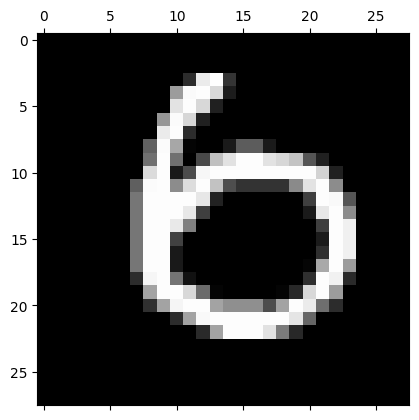

In [48]:
import random
random_integer = random.randint(0, 1000)


def predict(W1, b1, W2, b2, X):
    # Forward Propagation
    Z1 = np.dot(W1, X ) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # Assuming A2 represents the probabilities for each class
    # Choose the class with the highest probability as the predicted class
    predicted_class = np.argmax(A2)

    return predicted_class

# Example Usage
# Assuming X_test is the test dataset
# X_test: Input data (m, 728)

# Predict for the first example in the test dataset
prediction = predict(trained_W1, trained_b1, trained_W2, trained_b2, X_test[random_integer])
print("Predicted Class:", prediction)
plt.matshow(X_test[random_integer].reshape(28, 28), cmap='gray')
y_test[random_integer]

In [12]:
import numpy as np

# Assuming you have trained_W1, trained_b1, trained_W2, trained_b2

# Save the weights to a file
np.savez('trained_weights1.npz', W1=trained_W1, b1=trained_b1, W2=trained_W2, b2=trained_b2)

In [50]:

loaded_weights = np.load('trained_weights1.npz')

trained_W1 = loaded_weights.get("W1")
trained_b1 = loaded_weights.get("b1")
trained_W2 = loaded_weights.get("W2")
trained_b2 = loaded_weights.get("b2")
print(f"Accuracy :{calculate_accuracy(trained_W1, trained_b1, trained_W2, trained_b2,X_test, y_test)*100}%")

Accuracy :94.26%
